# Importing all related Liabriries and packages!!

In [ ]:
import pandas as pd

In [9]:
import numpy as np

In [49]:
import gzip
import os
import shutil
import re

            

In [124]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Business Understanding:
Before i start this project i wanted understand the business problem and and the movie business world! I wanted to find out what are the key factor contributess to good movie or good movie rating. different genres, actors/actresses, budgets, production house name, directors, and different platform where is this movie landing!

# Data exploring and understanding
all data from zippedData folder 
imdb.title.basics
imdb.title.ratings
bom.movie_gross
tn.movie_budgets.csv.gz

In [23]:
movie_gross =pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [24]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [25]:
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [26]:
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [28]:
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [29]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [30]:
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [32]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [33]:
#### now i am merging title to ratings to get movie name and ratings and vote together

title_ba_ra = pd.merge(title_basics,title_ratings)
title_ba_ra.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [34]:
title_ba_ra.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [35]:
#### i will now taking off primary title, start year. to minimize the data set before i do another merge with other data set.
budget.drop('release_date', axis=1, inplace= True)

In [36]:
title_ba_ra.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [37]:
### i want see any movie have at least more than 6 average ratings
df.loc[df['year'] > 2010]

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011
329,Transformers: Dark of the Moon,P/DW,352400000.0,771400000,2011
330,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
331,The Twilight Saga: Breaking Dawn Part 1,Sum.,281300000.0,430900000,2011
332,Mission: Impossible - Ghost Protocol,Par.,209400000.0,485300000,2011
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


    # there are pleanty of NaN value. missing value in the above dataset and i did not used mean value as it will not reflect true amount! left it alone ! potential remedy could be when we build a model and we have more new or current data this data field will show more accurate outcome!

In [39]:
### also want to see those movies at least got >10 votes.
title_ba_ra = title_ba_ra.loc[title_ba_ra['numvotes'] >10]
title_ba_ra.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [40]:
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [41]:
# Import pyplot for plotting
import matplotlib.pyplot as plt

%matplotlib inline

In [42]:
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [43]:
title_ba_ra = pd.merge(title_basics,title_ratings)
title_ba_ra.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [44]:
title_ba_ra.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [45]:
title_ba_ra[(title_ba_ra.averagerating > 7.0) & (title_ba_ra.genres == 'Action')]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
602,tt10075374,The Little Prince,The Little Prince,2019,93.0,Action,8.3,6
604,tt10075836,The Avengers Assemble Premiere,The Avengers Assemble Premiere,2012,NaN,Action,7.2,18
787,tt10254472,Alma de Héroe,Alma de Héroe,2019,120.0,Action,7.7,34
888,tt10404502,Grisaia: Phantom trigger the animation 02. Sou...,Grisaia: Phantom trigger the animation 02. Sou...,2019,54.0,Action,9.8,5
1746,tt1283930,One Long Day,One Long Day,2010,85.0,Action,7.4,31
...,...,...,...,...,...,...,...,...
72862,tt9221238,Polis Evo 2,Polis Evo 2,2018,125.0,Action,7.5,223
72989,tt9297624,Kamen Rider Heisei Generations Forever,Kamen Raidâ Heisei Jenerêshonzu Foebâ,2018,100.0,Action,7.5,39
73638,tt9737984,Striker,Striker,2019,122.0,Action,8.0,21
73664,tt9760512,D/O Parvathamma,D/O Parvathamma,2019,NaN,Action,9.6,427


# The reason i have only separated genres column in g1,g2 and g3 as movie genres decides based on its typical genres type which means 1st 3 category will cover most of the important genres!

In [46]:
title_ba_ra[['g1','g2','g3']]= title_ba_ra['genres'].str.split(',',expand=True)
title_ba_ra.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,g1,g2,g3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Biography,Drama,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Drama,None,None
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Comedy,Drama,Fantasy
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32,Horror,Thriller,None
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Adventure,Animation,Comedy
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451,Drama,None,None
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64,History,None,None
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53,Documentary,None,None


In [50]:
movie_gross =pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [51]:
### changing column names for title.
movie_gross.rename({'title' :'primary_title'}, axis = 1, inplace =True)
movie_gross.head()

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [52]:
title_ba_ra = pd.merge(movie_gross,title_ba_ra)
title_ba_ra.columns

Index(['primary_title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'tconst', 'original_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'g1', 'g2', 'g3'],
      dtype='object')

In [53]:
title_ba_ra.head()

,primary_title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,g1,g2,g3
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,Adventure,Animation,Comedy
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action,Adventure,Sci-Fi
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532,Adventure,Animation,Comedy
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,Adventure,Drama,Fantasy
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Action,Adventure,Sci-Fi


In [56]:
new =title_ba_ra.drop('tconst', axis=1, inplace =True )

In [109]:
title_ba_ra.head()

,primary_title,studio,domestic_gross,foreign_gross,year,original_title,runtime_minutes,genres,averagerating,numvotes,g1,g2,g3,new_genres
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,Adventure,Animation,Comedy,"[Adventure,Animation,Comedy]"
1,Inception,WB,292600000.0,535700000,2010,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action,Adventure,Sci-Fi,"[Action,Adventure,Sci-Fi]"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532,Adventure,Animation,Comedy,"[Adventure,Animation,Comedy]"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",5.0,211733,Adventure,Drama,Fantasy,"[Adventure,Drama,Fantasy]"
4,Iron Man 2,Par.,312400000.0,311500000,2010,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Action,Adventure,Sci-Fi,"[Action,Adventure,Sci-Fi]"


In [61]:
title_ba_ra.drop('start_year', axis=1, inplace= True)

In [63]:
title_ba_ra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    3027 non-null   object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3005 non-null   float64
 3   foreign_gross    1832 non-null   object 
 4   year             3027 non-null   int64  
 5   original_title   3027 non-null   object 
 6   runtime_minutes  2980 non-null   float64
 7   genres           3020 non-null   object 
 8   averagerating    3027 non-null   float64
 9   numvotes         3027 non-null   int64  
 10  g1               3020 non-null   object 
 11  g2               2395 non-null   object 
 12  g3               1563 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 331.1+ KB


In [66]:
title_mix.dtypes

dtype('float64')

In [87]:
title_ba_ra.tail()

,primary_title,studio,domestic_gross,foreign_gross,year,original_title,runtime_minutes,genres,averagerating,numvotes,g1,g2,g3
3022,Souvenir,Strand,11400.0,NaN,2018,Souvenir,90.0,"Drama,Music,Romance",6.0,823,Drama,Music,Romance
3023,Souvenir,Strand,11400.0,NaN,2018,Souvenir,86.0,"Comedy,Romance",5.9,9,Comedy,Romance,None
3024,Beauty and the Dogs,Osci.,8900.0,NaN,2018,Aala Kaf Ifrit,100.0,"Crime,Drama,Thriller",7.0,1016,Crime,Drama,Thriller
3025,The Quake,Magn.,6200.0,NaN,2018,Skjelvet,106.0,"Action,Drama,Thriller",6.2,5270,Action,Drama,Thriller
3026,An Actor Prepares,Grav.,1700.0,NaN,2018,An Actor Prepares,97.0,Comedy,5.0,388,Comedy,None,None


In [83]:
#### avarage movie runtime
title_ba_ra.runtime_minutes.mean()

107.21711409395974

In [103]:
title_new.mean()

78259685.94317685

In [102]:
title_ba_ra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    3027 non-null   object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3005 non-null   float64
 3   foreign_gross    1832 non-null   object 
 4   year             3027 non-null   int64  
 5   original_title   3027 non-null   object 
 6   runtime_minutes  2980 non-null   float64
 7   genres           3020 non-null   object 
 8   averagerating    3027 non-null   float64
 9   numvotes         3027 non-null   int64  
 10  g1               3020 non-null   object 
 11  g2               2395 non-null   object 
 12  g3               1563 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 331.1+ KB


In [223]:
df=title_ba_ra.head()
df.head()

,primary_title,studio,domestic_gross,foreign_gross,year,original_title,runtime_minutes,genres,averagerating,numvotes,g1,g2,g3,new_genres
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,Adventure,Animation,Comedy,"[Adventure,Animation,Comedy]"
1,Inception,WB,292600000.0,535700000,2010,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action,Adventure,Sci-Fi,"[Action,Adventure,Sci-Fi]"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532,Adventure,Animation,Comedy,"[Adventure,Animation,Comedy]"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",5.0,211733,Adventure,Drama,Fantasy,"[Adventure,Drama,Fantasy]"
4,Iron Man 2,Par.,312400000.0,311500000,2010,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Action,Adventure,Sci-Fi,"[Action,Adventure,Sci-Fi]"


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    5 non-null      object 
 1   studio           5 non-null      object 
 2   domestic_gross   5 non-null      float64
 3   foreign_gross    5 non-null      object 
 4   year             5 non-null      int64  
 5   original_title   5 non-null      object 
 6   runtime_minutes  5 non-null      float64
 7   genres           5 non-null      object 
 8   averagerating    5 non-null      float64
 9   numvotes         5 non-null      int64  
 10  g1               5 non-null      object 
 11  g2               5 non-null      object 
 12  g3               5 non-null      object 
 13  new_genres       5 non-null      object 
dtypes: float64(3), int64(2), object(9)
memory usage: 600.0+ bytes


#### masking with list
###df.dropna(inplace=True)
##df.dropna(inplace=True)
df['new_genres'] = df['genres'].str.split(',')
df['new_genres'] = df['new_genres'].apply(lambda x: list(set(x)))
df['new_genres'] = df['new_genres'].apply(lambda x: [[item] for item in x])
df1=df.explode("new_genres")
df2=df1.explode("new_genres")
df2.head(20)


In [119]:
#### dropping g1 to g3 as i have got separated genres now!
##df3=df2.drop(['g1','g2','g3'], axis=1,inplace =True)
###df2.head()

In [227]:
df2.head(50)

,primary_title,studio,domestic_gross,foreign_gross,year,original_title,runtime_minutes,genres,averagerating,numvotes,g1,g2,g3,new_genres
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,Adventure,Animation,Comedy,Animation
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,Adventure,Animation,Comedy,Adventure
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,Adventure,Animation,Comedy,Comedy
1,Inception,WB,292600000.0,535700000,2010,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action,Adventure,Sci-Fi,Adventure
1,Inception,WB,292600000.0,535700000,2010,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action,Adventure,Sci-Fi,Sci-Fi
1,Inception,WB,292600000.0,535700000,2010,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action,Adventure,Sci-Fi,Action
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532,Adventure,Animation,Comedy,Animation
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532,Adventure,Animation,Comedy,Adventure
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532,Adventure,Animation,Comedy,Comedy
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",5.0,211733,Adventure,Drama,Fantasy,Adventure


# Data Analysis and Visualisations


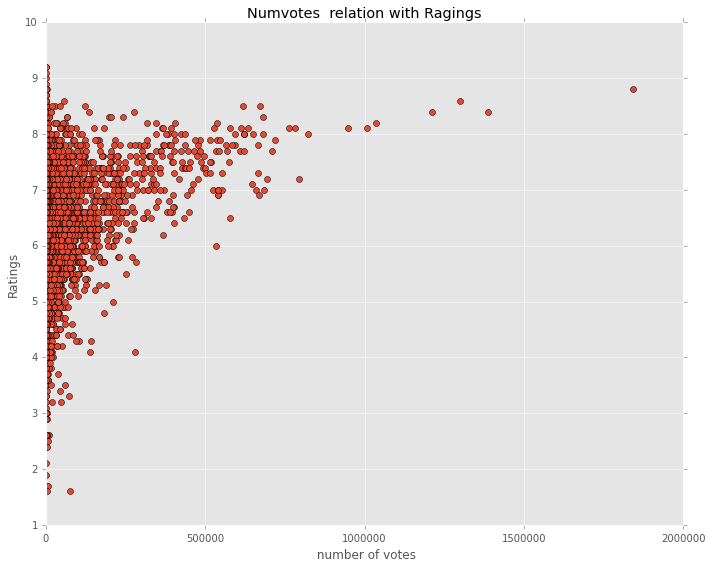

In [394]:
### this plot shows that the more number of the votes a movie gets and there average ratings aew better
plt.figure(figsize=(10,8))
plt.plot(title_ba_ra.numvotes, title_ba_ra.averagerating, 'o')

plt.title("Numvotes  relation with Ragings")
plt.xlabel(" number of votes")
plt.ylabel ("Ratings")
plt.savefig('numvote relations', dpi=300)
plt.show()

 # Above plot shows movie rating inbetween 6 to 8 gets most numbers of vote! Also when a movie gets more than 500k vote that rating gets good ratings!

In [167]:
action_rating = df2[(df2.averagerating > 2.0) & (df2.new_genres == 'Action')]
action_rating

,primary_title,studio,domestic_gross,foreign_gross,year,original_title,runtime_minutes,genres,averagerating,numvotes,g1,g2,g3,new_genres
1,Inception,WB,292600000.0,535700000,2010,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action,Adventure,Sci-Fi,Action
4,Iron Man 2,Par.,312400000.0,311500000,2010,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Action,Adventure,Sci-Fi,Action


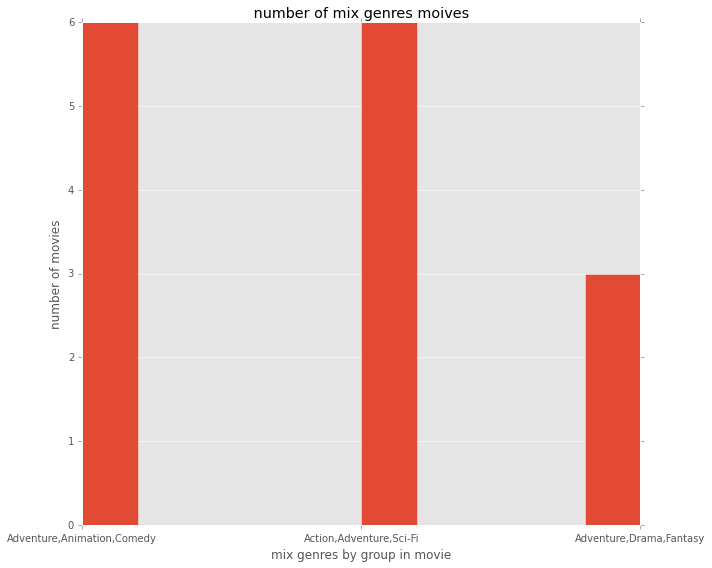

In [395]:
### histogram for most genres movie! mix genres movies 
plt.figure(figsize=(10,8))
bins=[0,40,80,120]
plt.hist(df1.genres)
plt.xticks()
plt.xlabel('mix genres by group in movie')
plt.ylabel('number of movies')
plt.title(' number of mix genres moives ')
plt.savefig('mix genres', dpi=300)
plt.show()


# Above Barchart tells us that out of all those mix genres group these are the 3 types of mix genres are common in most of movies! e.g= a mix of adventure,animation and comedy and action,adventure and scifi is popular mix! 

,primary_title,studio,domestic_gross,foreign_gross,year,original_title,runtime_minutes,genres,averagerating,numvotes,g1,g2,g3,new_genres
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,Adventure,Animation,Comedy,"[Adventure,Animation,Comedy]"
1,Inception,WB,292600000.0,535700000,2010,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action,Adventure,Sci-Fi,"[Action,Adventure,Sci-Fi]"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532,Adventure,Animation,Comedy,"[Adventure,Animation,Comedy]"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",5.0,211733,Adventure,Drama,Fantasy,"[Adventure,Drama,Fantasy]"
4,Iron Man 2,Par.,312400000.0,311500000,2010,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Action,Adventure,Sci-Fi,"[Action,Adventure,Sci-Fi]"


In [230]:
title_ba_ra.tail()

,primary_title,studio,domestic_gross,foreign_gross,year,original_title,runtime_minutes,genres,averagerating,numvotes,g1,g2,g3,new_genres
3022,Souvenir,Strand,11400.0,NaN,2018,Souvenir,90.0,"Drama,Music,Romance",6.0,823,Drama,Music,Romance,"[Drama,Music,Romance]"
3023,Souvenir,Strand,11400.0,NaN,2018,Souvenir,86.0,"Comedy,Romance",5.9,9,Comedy,Romance,None,"[Comedy,Romance]"
3024,Beauty and the Dogs,Osci.,8900.0,NaN,2018,Aala Kaf Ifrit,100.0,"Crime,Drama,Thriller",7.0,1016,Crime,Drama,Thriller,"[Crime,Drama,Thriller]"
3025,The Quake,Magn.,6200.0,NaN,2018,Skjelvet,106.0,"Action,Drama,Thriller",6.2,5270,Action,Drama,Thriller,"[Action,Drama,Thriller]"
3026,An Actor Prepares,Grav.,1700.0,NaN,2018,An Actor Prepares,97.0,Comedy,5.0,388,Comedy,None,None,[Comedy]


In [232]:
df5 = title_ba_ra.explode('new_genres')

In [234]:
df6 = df5.explode('new_genres')

In [236]:
df6

,primary_title,studio,domestic_gross,foreign_gross,year,original_title,runtime_minutes,genres,averagerating,numvotes,g1,g2,g3,new_genres
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,Adventure,Animation,Comedy,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action,Adventure,Sci-Fi,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532,Adventure,Animation,Comedy,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",5.0,211733,Adventure,Drama,Fantasy,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Action,Adventure,Sci-Fi,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,Souvenir,Strand,11400.0,NaN,2018,Souvenir,90.0,"Drama,Music,Romance",6.0,823,Drama,Music,Romance,"Drama,Music,Romance"
3023,Souvenir,Strand,11400.0,NaN,2018,Souvenir,86.0,"Comedy,Romance",5.9,9,Comedy,Romance,None,"Comedy,Romance"
3024,Beauty and the Dogs,Osci.,8900.0,NaN,2018,Aala Kaf Ifrit,100.0,"Crime,Drama,Thriller",7.0,1016,Crime,Drama,Thriller,"Crime,Drama,Thriller"
3025,The Quake,Magn.,6200.0,NaN,2018,Skjelvet,106.0,"Action,Drama,Thriller",6.2,5270,Action,Drama,Thriller,"Action,Drama,Thriller"


In [276]:
# those movies got minimum 6 or more rating
df7= df6.loc[df6['averagerating']>7.0] 
### i wanted see most recent years trend those movies made 2014 and over
df8= df7.loc[df7['year']>=2014] 
### i want to check runtime more than 90mins
df9= df8.loc[df8['runtime_minutes']>=90.0]
df9

,primary_title,studio,domestic_gross,foreign_gross,year,original_title,runtime_minutes,genres,averagerating,numvotes,g1,g2,g3,new_genres
1267,The Hobbit: The Battle of the Five Armies,WB (NL),255100000.0,700900000,2014,The Hobbit: The Battle of the Five Armies,144.0,"Adventure,Fantasy",7.4,438621,Adventure,Fantasy,None,"Adventure,Fantasy"
1268,Guardians of the Galaxy,BV,333200000.0,440200000,2014,Guardians of the Galaxy,121.0,"Action,Adventure,Comedy",8.1,948394,Action,Adventure,Comedy,"Action,Adventure,Comedy"
1271,X-Men: Days of Future Past,Fox,233900000.0,513900000,2014,X-Men: Days of Future Past,132.0,"Action,Adventure,Sci-Fi",8.0,620079,Action,Adventure,Sci-Fi,"Action,Adventure,Sci-Fi"
1272,Captain America: The Winter Soldier,BV,259800000.0,454500000,2014,Captain America: The Winter Soldier,136.0,"Action,Adventure,Sci-Fi",7.8,666252,Action,Adventure,Sci-Fi,"Action,Adventure,Sci-Fi"
1273,Dawn of the Planet of the Apes,Fox,208500000.0,502100000,2014,Dawn of the Planet of the Apes,130.0,"Action,Adventure,Drama",7.6,390199,Action,Adventure,Drama,"Action,Adventure,Drama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,Keys to the Heart,CJ,75100.0,NaN,2018,Geugeotmani Nae Sesang,120.0,"Comedy,Drama,Family",7.4,497,Comedy,Drama,Family,"Comedy,Drama,Family"
2999,The Last Suit,OutF,73500.0,NaN,2018,El último traje,91.0,Drama,7.1,409,Drama,None,None,Drama
3007,What Will People Say,KL,44200.0,NaN,2018,Hva vil folk si,106.0,Drama,7.5,3040,Drama,None,None,Drama
3010,"No Date, No Signature",Distrib.,36400.0,NaN,2018,"No Date, No Sign",104.0,"Drama,Mystery,Thriller",7.2,1687,Drama,Mystery,Thriller,"Drama,Mystery,Thriller"


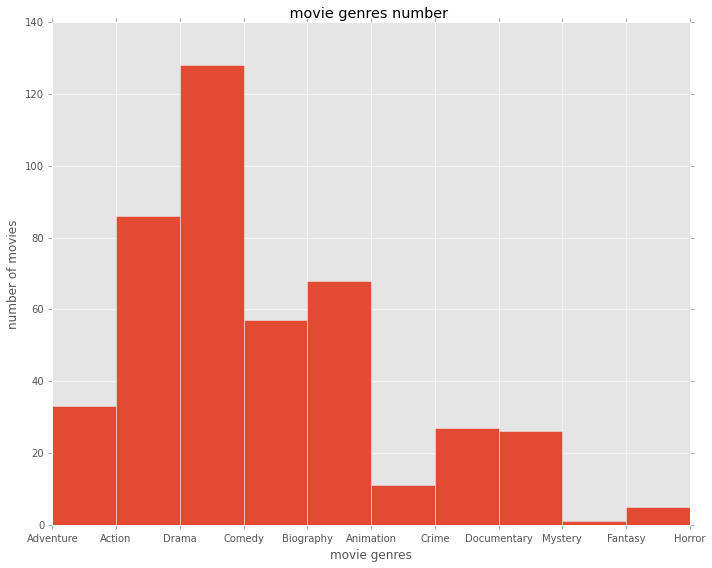

In [396]:
### histogram for most genres movie! sigle genres movies 2014 and over
plt.figure(figsize=(10,8))
bins=[0,10,20,30,40,50,60,70,80,90,100]
plt.hist(df9.g1)
plt.xticks()
plt.xlabel('movie genres')
plt.ylabel('number of movies')
plt.title(' movie genres number  ')
plt.savefig('movie genres number', dpi=300)
plt.show()

# Above barchart tells us about which are the genres types are most made movies after 2014! e.g= action, drama,animation comedy and adventure!

In [273]:
# those movies got minimum 6 or more rating
df7= df6.loc[df6['averagerating']>7.0] 
### i wanted see most recent years trend those movies made 2014 and before
df8= df7.loc[df7['year']<=2014] 
### i want to check runtime more than 90mins
df10= df8.loc[df8['runtime_minutes']>=90.0]
df10

,primary_title,studio,domestic_gross,foreign_gross,year,original_title,runtime_minutes,genres,averagerating,numvotes,g1,g2,g3,new_genres
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,Adventure,Animation,Comedy,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action,Adventure,Sci-Fi,"Action,Adventure,Sci-Fi"
5,Tangled,BV,200800000.0,391000000,2010,Tangled,100.0,"Adventure,Animation,Comedy",7.8,366366,Adventure,Animation,Comedy,"Adventure,Animation,Comedy"
6,Despicable Me,Uni.,251500000.0,291600000,2010,Despicable Me,95.0,"Animation,Comedy,Family",7.7,464511,Animation,Comedy,Family,"Animation,Comedy,Family"
7,How to Train Your Dragon,P/DW,217600000.0,277300000,2010,How to Train Your Dragon,98.0,"Action,Adventure,Animation",8.1,611299,Action,Adventure,Animation,"Action,Adventure,Animation"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,"1,000 Times Good Night",FM,53900.0,NaN,2014,Tusen ganger god natt,117.0,"Drama,War",7.1,6848,Drama,War,None,"Drama,War"
1575,The Missing Picture,Strand,52200.0,NaN,2014,L'image manquante,92.0,Documentary,7.4,2804,Documentary,None,None,Documentary
1587,Horses of God,KL,14800.0,NaN,2014,Les chevaux de Dieu,115.0,Drama,7.1,1487,Drama,None,None,Drama
1594,You're Not You,EOne,11500.0,NaN,2014,You're Not You,102.0,Drama,7.4,22156,Drama,None,None,Drama


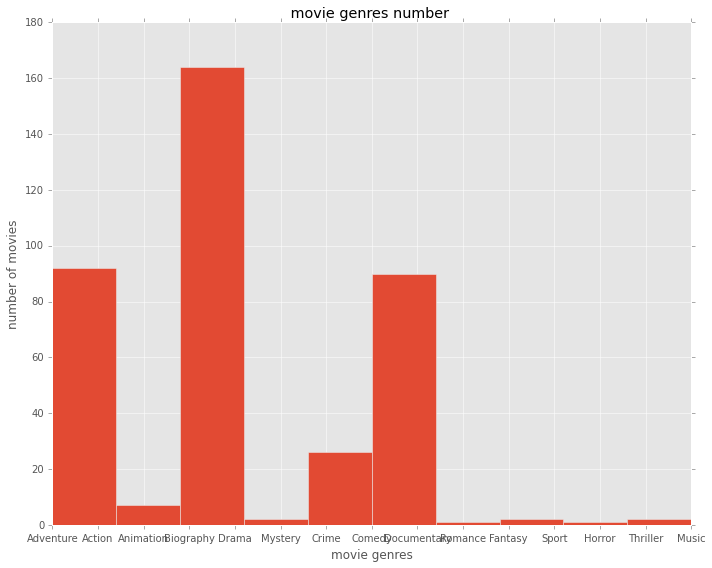

In [397]:
### histogram for most genres movie! sigle genres movies 2014 and before
plt.figure(figsize=(10,8))
bins=[0,10,20,30,40,50,60,70,80,90,100]
plt.hist(df10.g1)
plt.xticks()
plt.xlabel('movie genres')
plt.ylabel('number of movies')
plt.title(' movie genres number  ')
plt.savefig('movie genres number before 2014', dpi=300)
plt.show()

# Above barchart tells us about which are the genres types are most made movies before 2014! if we dig little bit in those two barchart which tells us that before 2014 the movie genres treand was drama, adventure,comedy.

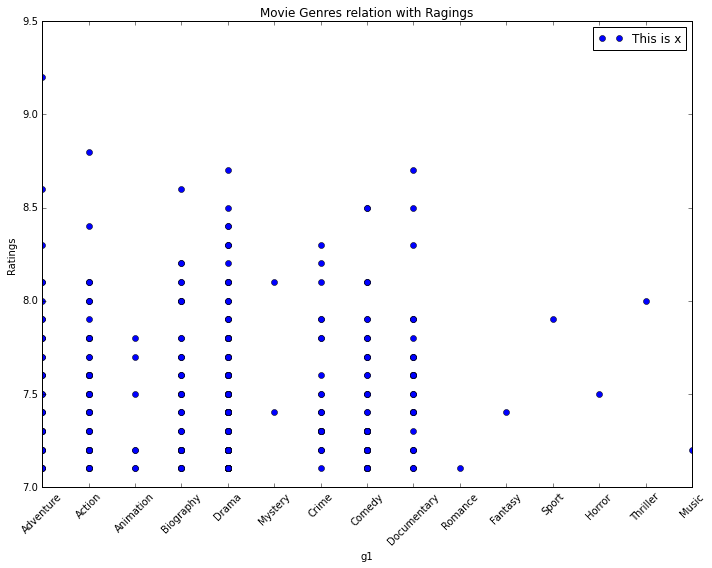

In [290]:
### next i want check which genres of movie gets better ratings above 7 with movie genres!!
plt.figure(figsize=(10,8))
plt.plot(df10.g1, df10.averagerating, 'o')
plt.title("Movie Genres relation with Ragings")
plt.rcParams["figure.autolayout"] = True
plt.xlabel("g1")
plt.ylabel ("Ratings")
plt.legend(["This is x"])
plt.xticks(rotation = 45)
plt.savefig('movie genres_rating', dpi=300)
plt.show()

# From above plot we can guess that not all the genres have very high movie rating!

In [327]:
lowrating = title_ba_ra.loc[title_ba_ra.averagerating <4].count()[0]
midrating = title_ba_ra.loc[(title_ba_ra.averagerating >=4) & (title_ba_ra.averagerating<6)].count()[0]
highmidrating = title_ba_ra.loc[(title_ba_ra.averagerating >= 6) & (title_ba_ra.averagerating <8)].count()[0]
highrating = title_ba_ra.loc[title_ba_ra.averagerating >=8].count()[0]

In [ ]:
####

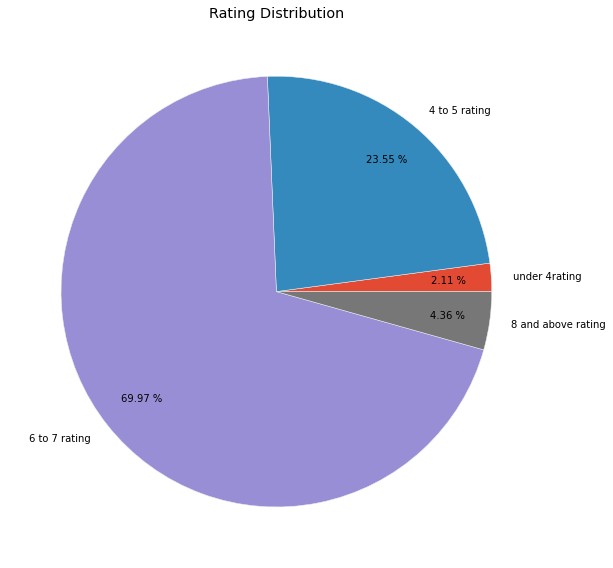

In [398]:
ratings = [lowrating,midrating,highmidrating,highrating]
labels = ['under 4rating','4 to 5 rating','6 to 7 rating' ,'8 and above rating']
plt.style.use('ggplot')
plt.subplots(figsize=(10, 8))
plt.pie(ratings, labels=labels,autopct='%.2f %%', pctdistance=0.8)
plt.title('Rating Distribution')
plt.savefig('Rating Distribution', dpi=300)
plt.show()

# above pie chart shows almost 70% ratings are belong to rating 6 to 7 where only 4.36% above 8!

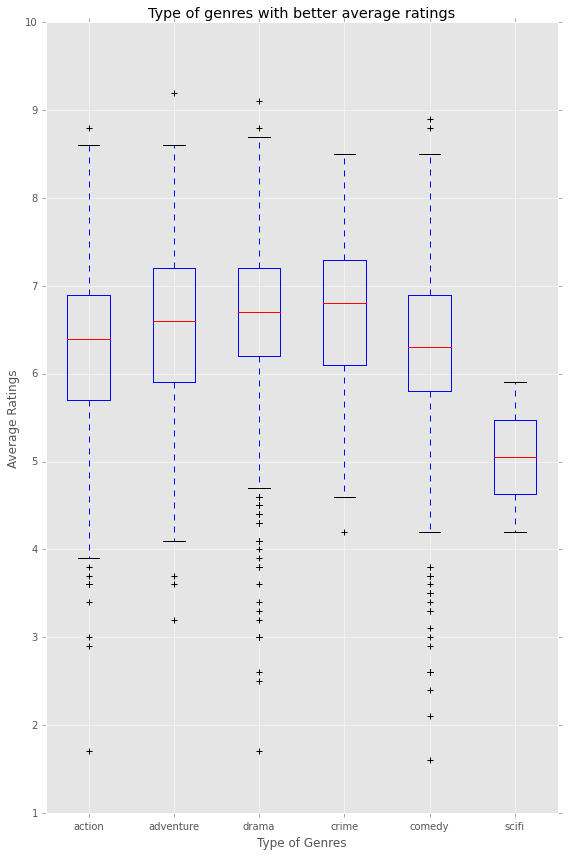

In [399]:
action= title_ba_ra.loc[title_ba_ra.g1 == 'Action']['averagerating']
adventure =title_ba_ra.loc[title_ba_ra.g1 == 'Adventure']['averagerating']
drama = title_ba_ra.loc[title_ba_ra.g1 == 'Drama']['averagerating']
crime = title_ba_ra.loc[title_ba_ra.g1 == 'Crime']['averagerating']
comedy = title_ba_ra.loc[title_ba_ra.g1 == 'Comedy']['averagerating']
scifi = title_ba_ra.loc[title_ba_ra.g1 == 'Sci-Fi']['averagerating']
plt.figure(figsize=(8,12))
labels = ['action','adventure','drama','crime','comedy','scifi']
plt.boxplot([action,adventure,drama,crime,comedy,scifi], labels=labels)
plt.title('Type of genres with better average ratings')
plt.ylabel('Average Ratings')
plt.xlabel('Type of Genres')
plt.savefig('numvote vs genres', dpi=300)
plt.show()

# above boxplot tells how above type of genres in movies standing based on their ratings!

In [372]:
title_ba_ra

,primary_title,studio,domestic_gross,foreign_gross,year,original_title,runtime_minutes,genres,averagerating,numvotes,g1,g2,g3,new_genres
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,Adventure,Animation,Comedy,"[Adventure,Animation,Comedy]"
1,Inception,WB,292600000.0,535700000,2010,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action,Adventure,Sci-Fi,"[Action,Adventure,Sci-Fi]"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532,Adventure,Animation,Comedy,"[Adventure,Animation,Comedy]"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",5.0,211733,Adventure,Drama,Fantasy,"[Adventure,Drama,Fantasy]"
4,Iron Man 2,Par.,312400000.0,311500000,2010,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Action,Adventure,Sci-Fi,"[Action,Adventure,Sci-Fi]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,Souvenir,Strand,11400.0,NaN,2018,Souvenir,90.0,"Drama,Music,Romance",6.0,823,Drama,Music,Romance,"[Drama,Music,Romance]"
3023,Souvenir,Strand,11400.0,NaN,2018,Souvenir,86.0,"Comedy,Romance",5.9,9,Comedy,Romance,None,"[Comedy,Romance]"
3024,Beauty and the Dogs,Osci.,8900.0,NaN,2018,Aala Kaf Ifrit,100.0,"Crime,Drama,Thriller",7.0,1016,Crime,Drama,Thriller,"[Crime,Drama,Thriller]"
3025,The Quake,Magn.,6200.0,NaN,2018,Skjelvet,106.0,"Action,Drama,Thriller",6.2,5270,Action,Drama,Thriller,"[Action,Drama,Thriller]"
